In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connect to Postgres

In [2]:
!pip install psycopg2

In [3]:
import psycopg2

In [4]:
postgres_connect= psycopg2.connect(
    user="postgres",
    password="*******",
    host="truck-delay-classification-postgresql.*****.rds.amazonaws.com",
    database="truckDB",
    port="5432"
)

In [5]:
sql_query= "select * from routes_details"

In [6]:
routes_df=pd.read_sql(sql_query, postgres_connect)

/tmp/ipykernel_11076/1567777423.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  routes_df=pd.read_sql(sql_query, postgres_connect)


In [7]:
routes_df.head(2)

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96


In [8]:
sql_query2="select * from routes_weather"

In [9]:
routes_weather=pd.read_sql(sql_query2,postgres_connect)

/tmp/ipykernel_11076/3493221296.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  routes_weather=pd.read_sql(sql_query2,postgres_connect)


In [10]:
routes_weather.head(1)

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0


In [11]:
routes_weather.shape

(425712, 13)

In [12]:
routes_df.shape

(2352, 5)

In [13]:
# Closes the database connection
postgres_connect.commit()
postgres_connect.close()  


# Connect to MySql

In [14]:
!pip install pymysql

In [15]:
import pymysql

In [16]:
mysql_connect=pymysql.connect(
    user="admin",
    password="******",
    host="truck-delay-classification-mysql.*****.rds.amazonaws.com",
    database="TruckDB"
)

## To navigate the entire database; use .cursor()

In [17]:
cursor=mysql_connect.cursor()

In [18]:
cursor.execute("SHOW TABLES")

5

In [19]:
for table_name in cursor:
    print(table_name)

('city_weather',)
('drivers_details',)
('traffic_details',)
('truck_details',)
('truck_schedule_data',)


In [20]:
query1="select * from city_weather"
city_weather=pd.read_sql(query1, mysql_connect)

/tmp/ipykernel_11076/2288413617.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  city_weather=pd.read_sql(query1, mysql_connect)


In [21]:
city_weather.shape

(55176, 14)

In [22]:
query2="select * from drivers_details"
drivers_df=pd.read_sql(query2, mysql_connect)

/tmp/ipykernel_11076/1615129393.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drivers_df=pd.read_sql(query2, mysql_connect)


In [23]:
query3="select * from traffic_details"
traffic_df=pd.read_sql(query3, mysql_connect)

/tmp/ipykernel_11076/4239517180.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  traffic_df=pd.read_sql(query3, mysql_connect)


In [24]:
query4="select * from truck_schedule_data"
schedule_df=pd.read_sql(query4, mysql_connect)

/tmp/ipykernel_11076/1504434724.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_df=pd.read_sql(query4, mysql_connect)


In [25]:
query5="select * from truck_details"
truck_df=pd.read_sql(query5, mysql_connect)

/tmp/ipykernel_11076/2266866804.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  truck_df=pd.read_sql(query5, mysql_connect)


In [26]:
print(truck_df.shape,"\n",
      schedule_df.shape,"\n",
      traffic_df.shape,"\n",
      drivers_df.shape,"\n",
      city_weather.shape
     )
      
      
      

(1300, 5) 
 (12308, 5) 
 (2597913, 5) 
 (1300, 9) 
 (55176, 14)


In [27]:
#close connection
mysql_connect.commit()
cursor.close()
mysql_connect.close()


# Exploartory Data Analysis (EDA)

## Driver's Data Analysis

In [28]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [29]:
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [30]:
drivers_df.describe()

,age,experience,ratings,vehicle_no,average_speed_mph
count,1300.000000,1300.000000,1300.000000,1.300000e+03,1300.000000
mean,47.814615,11.988462,5.633846,3.263242e+07,53.262854
std,4.973240,6.951765,2.137266,2.205390e+07,8.504282
min,28.000000,-8.000000,2.000000,1.000839e+07,29.150000
25%,45.000000,7.000000,4.000000,1.817244e+07,45.427500
50%,48.000000,11.000000,6.000000,2.584212e+07,57.340000
75%,51.000000,17.000000,8.000000,3.340052e+07,60.350000
max,65.000000,35.000000,9.000000,9.998167e+07,67.240000


Text(0.5, 1.0, 'Gender and Rating Plot')

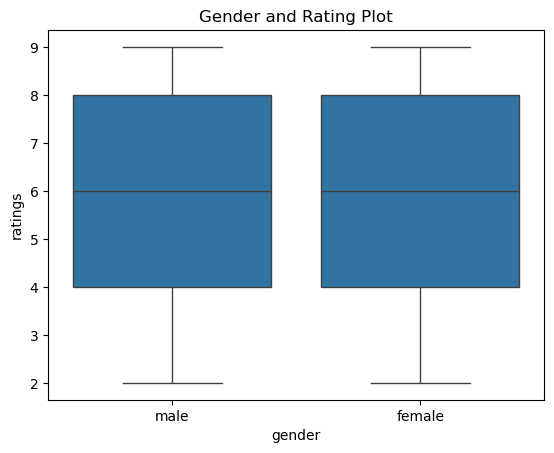

In [31]:
#boxplot between gender and ratings

sns.boxplot(x='gender', y='ratings', data=drivers_df)
plt.title("Gender and Rating Plot")

<Axes: xlabel='ratings', ylabel='average_speed_mph'>

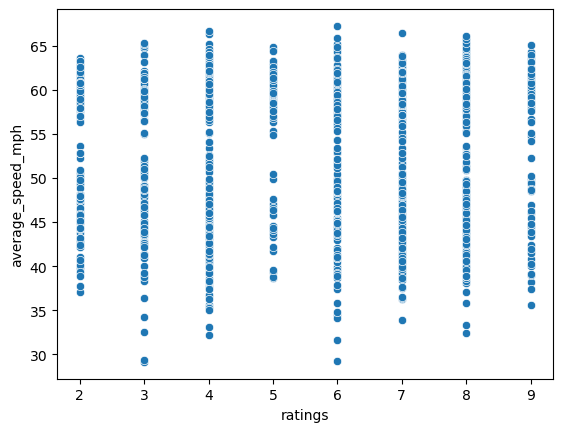

In [32]:
sns.scatterplot(x='ratings',y='average_speed_mph',data=drivers_df)

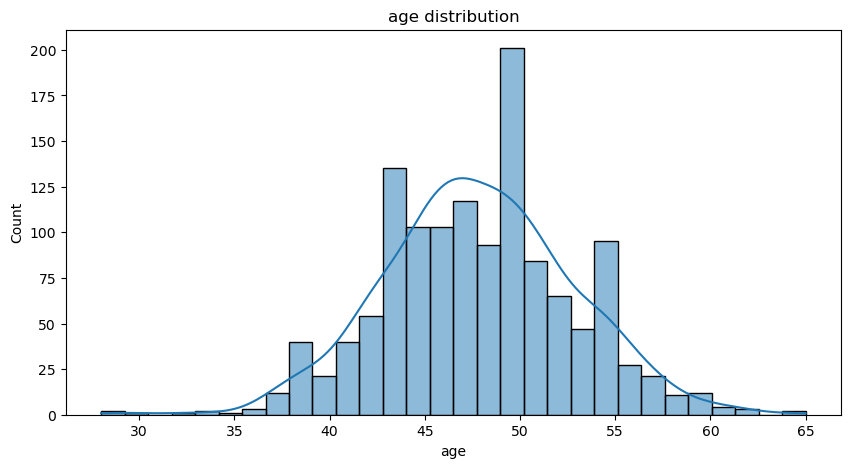

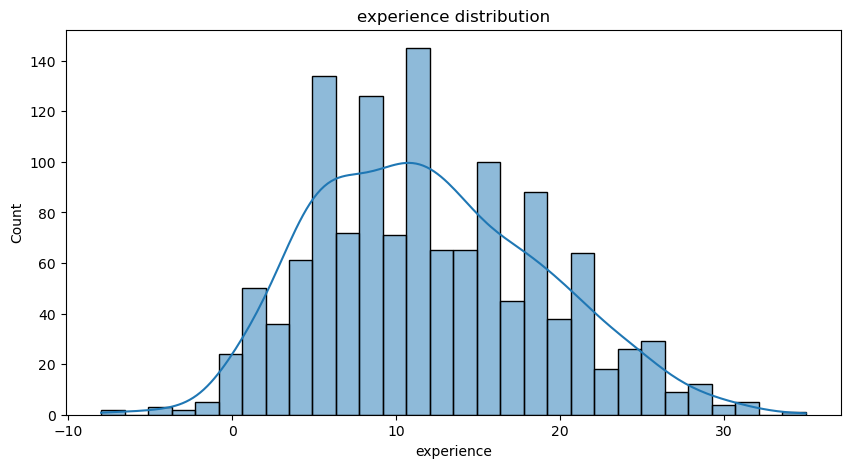

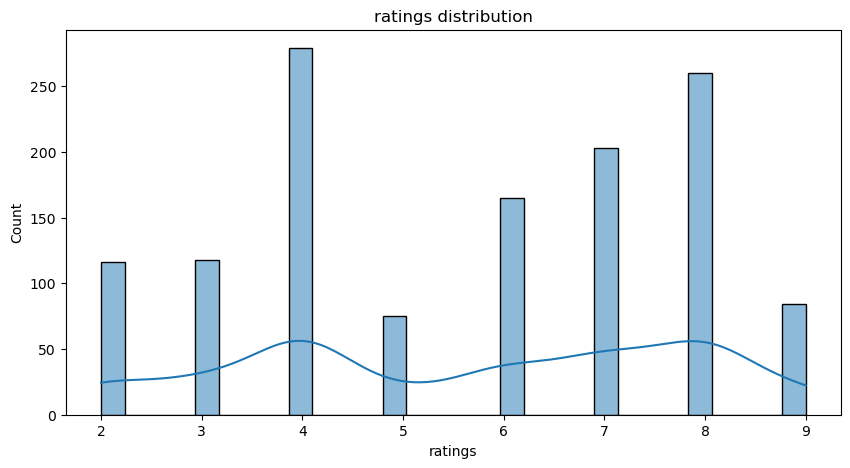

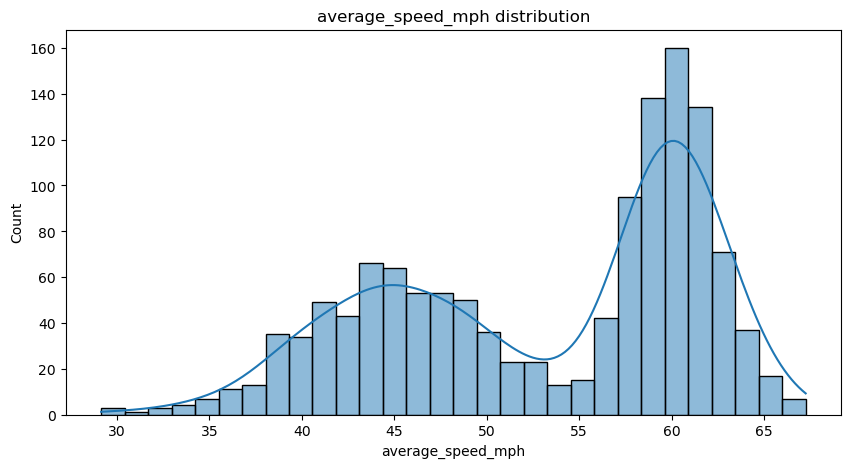

In [33]:
#list of numerical columns to visualize
drivers_num_cols=['age','experience','ratings','average_speed_mph']

#loop through each numerical column and create histograms with KDE
for col in drivers_num_cols:
    plt.figure(figsize=(10, 5))

    #Create a histogram with KDE using seaborn
    sns.histplot(drivers_df[col], bins=30, kde=True)
    #set the title
    plt.title(f'{col} distribution')
    #set the label for the x-axis
    plt.xlabel(f'{col}')
    plt.show()

## Truck Details Analysis

In [34]:
truck_df.head(2)

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel


In [35]:
truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [36]:
truck_df.describe(include='all')

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
count,1.300000e+03,1300.000000,1243.000000,1300.000000,1300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,diesel
freq,NaN,NaN,NaN,NaN,692
mean,3.263242e+07,9.513077,8610.619469,20.784615,NaN
std,2.205390e+07,2.039030,5583.759795,3.655876,NaN
min,1.000839e+07,3.000000,3000.000000,11.000000,NaN
25%,1.817244e+07,8.000000,4000.000000,18.000000,NaN
50%,2.584212e+07,10.000000,6000.000000,21.000000,NaN
75%,3.340052e+07,11.000000,15000.000000,24.000000,NaN


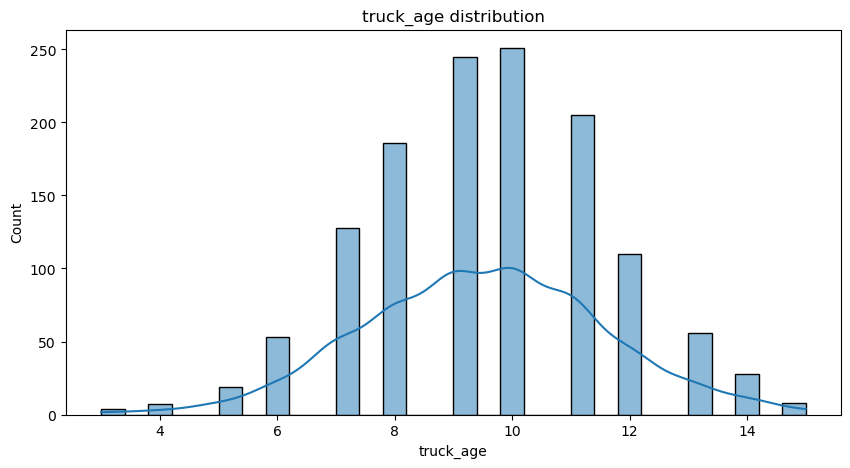

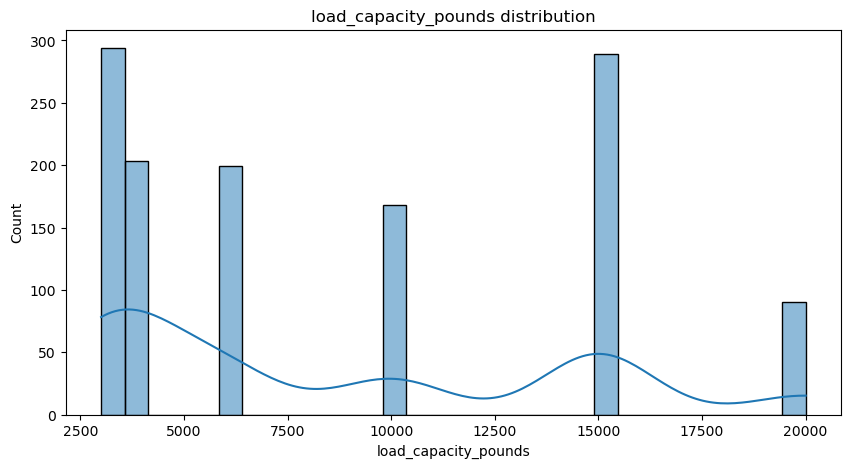

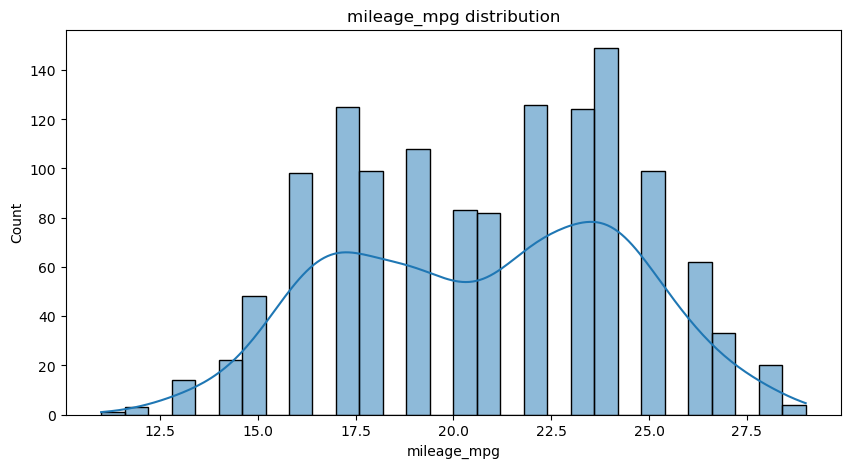

In [37]:
#list of numerical columns to visualize
truck_num_cols=['truck_age','load_capacity_pounds','mileage_mpg']

#loop through each numerical column and create histograms with KDE
for col in truck_num_cols:
    plt.figure(figsize=(10, 5))

    #Create a histogram with KDE using seaborn
    sns.histplot(truck_df[col], bins=30, kde=True)
    #set the title
    plt.title(f'{col} distribution')
    #set the label for the x-axis
    plt.xlabel(f'{col}')
    plt.show()

In [38]:
low_mileage=truck_df[truck_df['mileage_mpg']<=15]
low_mileage.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
5,29303248,9,4000.0,15,gas
7,21093078,8,NaN,14,gas
20,96362807,11,3000.0,14,gas
27,25645401,12,6000.0,14,gas
35,14541120,12,15000.0,14,gas


In [39]:
low_mileage.shape

(88, 5)

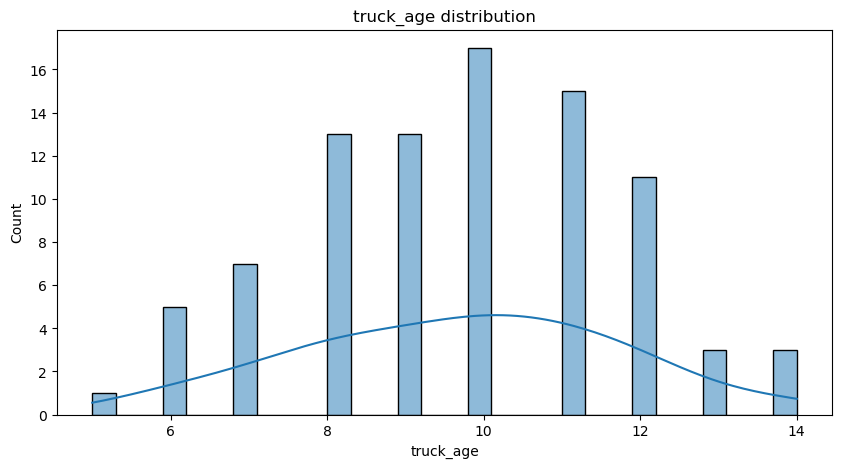

In [40]:
#plotting low_mileage against truck age

plt.figure(figsize=(10, 5))

#Create a histogram with KDE using seaborn
sns.histplot(low_mileage["truck_age"], bins=30, kde=True)
#set the title
plt.title(f'{"truck_age"} distribution')
#set the label for the x-axis
plt.xlabel(f'{"truck_age"}')
plt.show()

## Traffic and Weather Data Analysis

In [41]:
traffic_df.head(2)

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0


In [42]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   route_id        object 
 1   date            object 
 2   hour            int64  
 3   no_of_vehicles  float64
 4   accident        int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 99.1+ MB


In [43]:
traffic_df.describe(include='all')

,route_id,date,hour,no_of_vehicles,accident
count,2597913,2597913,2.597913e+06,2.596761e+06,2.597913e+06
unique,2352,46,NaN,NaN,NaN
top,R-48cfa4e6,2019-02-08,NaN,NaN,NaN
freq,1148,56488,NaN,NaN,NaN
mean,NaN,NaN,1.150021e+03,1.566776e+03,5.320848e-02
std,NaN,NaN,6.922211e+02,8.959424e+02,2.244490e-01
min,NaN,NaN,0.000000e+00,1.000000e+02,0.000000e+00
25%,NaN,NaN,6.000000e+02,6.060000e+02,0.000000e+00
50%,NaN,NaN,1.200000e+03,1.969000e+03,0.000000e+00
75%,NaN,NaN,1.800000e+03,2.326000e+03,0.000000e+00


In [44]:
def categorize_time(hour):
    if 300<=hour<600:
        return 'Early Morning'
    elif 600 <= hour <1200:
        return 'Morning'
    elif 1200 <= hour < 1600:
        return 'Noon'
    elif 1600 <= hour < 2000:
        return 'Evening'
    elif 2000 <= hour < 2300:
        return 'Night'
    elif 0 <= hour < 300:
        return 'Night'
traffic=traffic_df.copy()
traffic['time_category']=traffic['hour'].apply(categorize_time)
        
        

In [45]:
traffic.head()

,route_id,date,hour,no_of_vehicles,accident,time_category
0,R-ada2a391,2019-01-01,0,669.0,0,Night
1,R-ada2a391,2019-01-01,100,628.0,0,Night
2,R-ada2a391,2019-01-01,200,516.0,0,Night
3,R-ada2a391,2019-01-01,300,582.0,0,Early Morning
4,R-ada2a391,2019-01-01,400,564.0,0,Early Morning


In [46]:
traffic.groupby('time_category')['no_of_vehicles'].mean()

time_category
Early Morning     563.030071
Evening          1999.185426
Morning          1735.696694
Night            1263.594675
Noon             1990.786218
Name: no_of_vehicles, dtype: float64

In [47]:
traffic.groupby('time_category')['accident'].sum()

time_category
Early Morning    17315
Evening          22863
Morning          34477
Night            34965
Noon             22805
Name: accident, dtype: int64

In [48]:
traffic['date']=pd.to_datetime(traffic['date'])

## City Weather Analysis

In [49]:
city_weather.head(2)

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0


In [50]:
city_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_id          55176 non-null  object 
 1   date             55176 non-null  object 
 2   hour             55176 non-null  int64  
 3   temp             55176 non-null  float64
 4   wind_speed       55176 non-null  float64
 5   description      55176 non-null  object 
 6   precip           55176 non-null  float64
 7   humidity         55176 non-null  int64  
 8   visibility       55176 non-null  float64
 9   pressure         55176 non-null  float64
 10  chanceofrain     55176 non-null  float64
 11  chanceoffog      55176 non-null  float64
 12  chanceofsnow     55176 non-null  float64
 13  chanceofthunder  55176 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 5.9+ MB


In [51]:
city_weather['date']=pd.to_datetime(city_weather['date'])

In [52]:
city_weather.describe(include='all')

/tmp/ipykernel_11076/3640512792.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  city_weather.describe(include='all')


,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176,55176,55176.000000,55176.000000,55176.000000,55176,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
unique,49,46,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C-9bbf5d8a,2019-01-01 00:00:00,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2208,1200,NaN,NaN,NaN,10252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1150.000000,36.896169,7.888647,NaN,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,NaN,NaN,692.224928,21.766273,4.349798,NaN,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,NaN,NaN,0.000000,-35.000000,0.000000,NaN,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,NaN,NaN,575.000000,23.000000,5.000000,NaN,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0


## Routes Data Analysis

In [53]:
routes_df.head(2)

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96


In [54]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [55]:
routes_df.describe(include='all')

,route_id,origin_id,destination_id,distance,average_hours
count,2352,2352,2352,2352.000000,2352.000000
unique,2352,49,49,NaN,NaN
top,R-38a366a9,C-927ceb5e,C-56e39a5e,NaN,NaN
freq,1,48,48,NaN,NaN
mean,NaN,NaN,NaN,2376.825230,47.536556
std,NaN,NaN,NaN,2696.904248,53.938045
min,NaN,NaN,NaN,3.900000,0.080000
25%,NaN,NaN,NaN,557.365000,11.147500
50%,NaN,NaN,NaN,1104.825000,22.100000
75%,NaN,NaN,NaN,2516.407500,50.327500


In [56]:
routes_df.groupby(['origin_id','destination_id'], as_index=False).agg(total_routes=('route_id','nunique'))

,origin_id,destination_id,total_routes
0,C-01660979,C-03bb3e48,1
1,C-01660979,C-19236709,1
2,C-01660979,C-280b55fb,1
3,C-01660979,C-2aaf0e1a,1
4,C-01660979,C-2bd47dc5,1
...,...,...,...
2347,C-ff8c0c3c,C-e6dcda92,1
2348,C-ff8c0c3c,C-ef47bdcd,1
2349,C-ff8c0c3c,C-f5ed4c15,1
2350,C-ff8c0c3c,C-f8f01604,1


## Routes Weather Data Analysis

In [57]:
routes_weather.head(2)

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0


In [58]:
routes_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425712 entries, 0 to 425711
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   route_id         425712 non-null  object        
 1   Date             425712 non-null  datetime64[ns]
 2   temp             425712 non-null  float64       
 3   wind_speed       425712 non-null  float64       
 4   description      425712 non-null  object        
 5   precip           425712 non-null  float64       
 6   humidity         425712 non-null  int64         
 7   visibility       425712 non-null  float64       
 8   pressure         425712 non-null  int64         
 9   chanceofrain     425712 non-null  int64         
 10  chanceoffog      425712 non-null  int64         
 11  chanceofsnow     425712 non-null  int64         
 12  chanceofthunder  425712 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 42.2+ 

In [59]:
routes_weather.describe(include='all')

/tmp/ipykernel_11076/1224300838.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  routes_weather.describe(include='all')


,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712,425712,425712.000000,425712.000000,425712,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
unique,2352,181,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R-38a366a9,2019-02-14 18:00:00,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,181,2352,NaN,NaN,99356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,57.518090,8.016063,NaN,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,NaN,NaN,19.919266,4.469639,NaN,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,NaN,NaN,-24.000000,0.000000,NaN,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,NaN,NaN,43.000000,5.000000,NaN,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0


In [60]:
set(routes_weather['description'])

{'Blizzard',
 'Blowing snow',
 'Clear',
 'Cloudy',
 'Fog',
 'Freezing drizzle',
 'Freezing fog',
 'Heavy freezing drizzle',
 'Heavy rain',
 'Heavy rain at times',
 'Heavy snow',
 'Ice pellets',
 'Light drizzle',
 'Light freezing rain',
 'Light rain',
 'Light rain shower',
 'Light showers of ice pellets',
 'Light sleet',
 'Light sleet showers',
 'Light snow',
 'Light snow showers',
 'Mist',
 'Moderate or heavy freezing rain',
 'Moderate or heavy rain shower',
 'Moderate or heavy rain with thunder',
 'Moderate or heavy sleet',
 'Moderate or heavy sleet showers',
 'Moderate or heavy snow showers',
 'Moderate or heavy snow with thunder',
 'Moderate rain',
 'Moderate rain at times',
 'Moderate snow',
 'Overcast',
 'Partly cloudy',
 'Patchy freezing drizzle possible',
 'Patchy heavy snow',
 'Patchy light drizzle',
 'Patchy light rain',
 'Patchy light rain with thunder',
 'Patchy light snow',
 'Patchy light snow with thunder',
 'Patchy moderate snow',
 'Patchy rain possible',
 'Patchy sleet p

In [61]:
set(city_weather['description'])-set(routes_weather['description'])

{'Moderate or heavy showers of ice pellets'}

In [62]:
set(routes_weather['description'])-set(city_weather['description'])

{'Moderate or heavy sleet showers', 'Patchy light snow with thunder'}

## Schedule Data Analysis

In [63]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   truck_id           12308 non-null  int64         
 1   route_id           12308 non-null  object        
 2   departure_date     12308 non-null  datetime64[ns]
 3   estimated_arrival  12308 non-null  object        
 4   delay              12308 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 480.9+ KB


In [64]:
schedule_df.head(2)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0


In [65]:
schedule_df['estimated_arrival']=pd.to_datetime(schedule_df['estimated_arrival'])

In [66]:
schedule_df.describe()

,truck_id,delay
count,1.230800e+04,12308.000000
mean,3.291135e+07,0.348879
std,2.221287e+07,0.476635
min,1.000839e+07,0.000000
25%,1.844361e+07,0.000000
50%,2.611401e+07,0.000000
75%,3.325027e+07,1.000000
max,9.998167e+07,1.000000


In [67]:
schedule_df['estimated_arrival']=pd.to_datetime(schedule_df['estimated_arrival'])

# Data Preprocessing

## Drivers_df

In [68]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [69]:
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [70]:
drivers_df.isna().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [71]:
drivers_df['gender']=drivers_df['gender'].fillna('Unknown')

In [72]:
drivers_df['driving_style']=drivers_df['driving_style'].fillna('Unknown')

In [73]:
drivers_df['driver_id'].duplicated().sum()

0

In [74]:
drivers_df[drivers_df.experience<0]

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
151,87a34a65-1,Ronald Campbell,male,50,-7,conservative,4,21928760,35.20
258,73abe416-e,David Kennedy,male,48,-2,conservative,8,24034677,42.67
263,c0cc3366-f,Christopher Knight,male,49,-2,proactive,8,31840617,58.94
448,0d090479-f,Joshua Hernandez,male,48,-2,proactive,2,19167358,58.26
518,432fc063-2,Scott Levy,male,46,-3,proactive,8,14625993,64.51
575,2adfe6cd-b,Steven Murray,male,42,-3,proactive,8,89718106,61.59
584,443ead57-c,Michael Bullock,male,42,-5,conservative,3,30137411,50.49
645,84ceeb04-5,John Tucker,male,48,-1,conservative,8,29624480,48.47
856,940779db-6,Sandra Martinez,Unknown,49,-5,conservative,3,42300252,49.06
893,fd0c9ec1-d,David Rangel,male,46,-4,proactive,4,18950712,59.87


In [75]:
drivers_df['experience']=np.where(drivers_df.experience<0, abs(drivers_df.experience), drivers_df.experience)

In [76]:
drivers_df.describe()

,age,experience,ratings,vehicle_no,average_speed_mph
count,1300.000000,1300.000000,1300.000000,1.300000e+03,1300.000000
mean,47.814615,12.054615,5.633846,3.263242e+07,53.262854
std,4.973240,6.836320,2.137266,2.205390e+07,8.504282
min,28.000000,0.000000,2.000000,1.000839e+07,29.150000
25%,45.000000,7.000000,4.000000,1.817244e+07,45.427500
50%,48.000000,11.000000,6.000000,2.584212e+07,57.340000
75%,51.000000,17.000000,8.000000,3.340052e+07,60.350000
max,65.000000,35.000000,9.000000,9.998167e+07,67.240000


In [77]:
drivers_df.corr()

/tmp/ipykernel_11076/686381233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  drivers_df.corr()


,age,experience,ratings,vehicle_no,average_speed_mph
age,1.000000,0.594806,0.253400,0.017698,0.001834
experience,0.594806,1.000000,0.327033,0.026842,-0.004308
ratings,0.253400,0.327033,1.000000,-0.000161,0.011820
vehicle_no,0.017698,0.026842,-0.000161,1.000000,0.011184
average_speed_mph,0.001834,-0.004308,0.011820,0.011184,1.000000


## Trucks_df

In [78]:
truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [79]:
truck_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [80]:
truck_df['fuel_type'].unique()

array(['gas', 'diesel', ''], dtype=object)

In [81]:
truck_df['fuel_type']=truck_df['fuel_type'].replace('', 'Unknown')

In [82]:
truck_df['fuel_type'].value_counts()

diesel     692
gas        568
Unknown     40
Name: fuel_type, dtype: int64

In [83]:
truck_df.duplicated().sum()

0

## Routes_df 

In [84]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [85]:
routes_df.isna().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [86]:
routes_df.describe()

,distance,average_hours
count,2352.000000,2352.000000
mean,2376.825230,47.536556
std,2696.904248,53.938045
min,3.900000,0.080000
25%,557.365000,11.147500
50%,1104.825000,22.100000
75%,2516.407500,50.327500
max,10055.010000,201.100000


In [87]:
routes_df[routes_df.distance>8000]

,route_id,origin_id,destination_id,distance,average_hours
36,R-1eed753c,C-927ceb5e,C-34ae77b0,8964.48,179.29
42,R-c03cec67,C-927ceb5e,C-2e349ccd,8518.61,170.37
70,R-7f1c71f0,C-56e39a5e,C-f5ed4c15,8744.35,174.89
84,R-3970df53,C-56e39a5e,C-34ae77b0,8291.36,165.83
90,R-25828d3e,C-56e39a5e,C-2e349ccd,8157.87,163.16
...,...,...,...,...,...
2251,R-54e2dd4c,C-841ebdcb,C-2e349ccd,8514.95,170.30
2293,R-7e706884,C-e6dcda92,C-34ae77b0,8730.24,174.60
2299,R-1c86de64,C-e6dcda92,C-2e349ccd,8731.38,174.63
2341,R-03e478bb,C-594514f8,C-34ae77b0,9202.84,184.06


## Schedule_df

In [88]:
schedule_df.isna().sum()

truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [89]:
schedule_df.duplicated().sum()

0

## Traffic_df

In [90]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [91]:
traffic_df.duplicated().sum()

0

In [92]:
traffic_df['hour']=traffic_df['hour'].apply(lambda x: f'{x:04d}')

In [93]:
traffic_df['hour']=pd.to_datetime(traffic_df['hour'], format ='%H%M').dt.time

In [94]:
date_hour=pd.to_datetime(traffic_df['date'].astype('str') + ' ' +traffic_df['hour'].astype('str'))

In [95]:
traffic_df.insert(1,'custom_date', date_hour)

In [96]:
traffic_df.drop(columns=['date','hour'],inplace=True)

In [97]:
traffic_df.head(2)

,route_id,custom_date,no_of_vehicles,accident
0,R-ada2a391,2019-01-01 00:00:00,669.0,0
1,R-ada2a391,2019-01-01 01:00:00,628.0,0


## City_weather

In [98]:
city_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city_id          55176 non-null  object        
 1   date             55176 non-null  datetime64[ns]
 2   hour             55176 non-null  int64         
 3   temp             55176 non-null  float64       
 4   wind_speed       55176 non-null  float64       
 5   description      55176 non-null  object        
 6   precip           55176 non-null  float64       
 7   humidity         55176 non-null  int64         
 8   visibility       55176 non-null  float64       
 9   pressure         55176 non-null  float64       
 10  chanceofrain     55176 non-null  float64       
 11  chanceoffog      55176 non-null  float64       
 12  chanceofsnow     55176 non-null  float64       
 13  chanceofthunder  55176 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int6

In [99]:
city_weather.duplicated().sum()

0

In [100]:
columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder']

In [101]:
city_weather.drop(columns=columns, inplace=True)

In [102]:
city_weather.head(2)

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0


In [103]:
city_weather['hour']=city_weather['hour'].apply(lambda x: f'{x:04d}')

In [104]:
city_weather['hour']=pd.to_datetime(city_weather['hour'], format ='%H%M').dt.time

In [105]:
date_hour=pd.to_datetime(city_weather['date'].astype('str') + ' ' +city_weather['hour'].astype('str'))

In [106]:
city_weather.insert(1,'custom_date', date_hour)

In [107]:
city_weather.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01 00:00:00,2019-01-01,00:00:00,30.0,11.0,Light snow,0.0,86,6.0,1019.0
1,C-927ceb5e,2019-01-01 01:00:00,2019-01-01,01:00:00,28.0,12.0,Light snow,0.0,86,5.0,1021.0


## Routes_weather

In [108]:
routes_weather.drop(columns=columns, inplace=True)

In [109]:
routes_weather.head(2)

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012


In [110]:
routes_weather.duplicated().sum()

0

In [111]:
routes_weather.head(2)

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012


# Feature Engineering

## Data

- city_weather_df
- routes_df
- drivers_df
- routes_weather
- trucks_df
- traffic_df
- schedule_df

## Feature Engineering schedule_df x routes_weather

In [112]:
schedule_df.head(2)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0


In [113]:
routes_weather=routes_weather.sort_values(by=['route_id','Date']).reset_index(drop=True)

In [114]:
routes_weather.head(2)

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,R-003c7a81,2019-01-01 00:00:00,68.0,8.0,Patchy rain possible,0.0,95,6.0,1003
1,R-003c7a81,2019-01-01 06:00:00,70.0,7.0,Partly cloudy,0.0,95,6.0,1003


In [115]:
routes_weather.rename(columns={'Date':'date'},inplace=True)

#### changing departure_date and estimated_arrival in schedule_df to every 6hrs to match interval as routes_weather

In [116]:
#adding a unique id column for the new change
schedule_df.insert(0,'unique_id',np.arange(len(schedule_df)))

In [117]:
schedule_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0


In [118]:
new_schedule_df=schedule_df.copy()

In [119]:
#using the .floor() to approximate to nearest 6 hour
new_schedule_df['departure_date']=new_schedule_df['departure_date'].dt.floor("6H")

In [120]:
new_schedule_df['estimated_arrival']=new_schedule_df['estimated_arrival'].dt.ceil("6H")

In [121]:
new_schedule_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,30312694,R-b236e347,2019-01-01 06:00:00,2019-01-01 18:00:00,0
1,1,59856374,R-29ea762e,2019-01-01 06:00:00,2019-01-02 06:00:00,0


In [122]:
explode_schedule_df=new_schedule_df.assign(date=[pd.date_range(start,end,freq='6H')
for start, end in zip(new_schedule_df['departure_date'],new_schedule_df['estimated_arrival'])]).explode('date',ignore_index=True)

In [123]:
schedule_weather=explode_schedule_df.merge(routes_weather, on=['route_id','date'], how='left')

In [193]:
schedule_weather.shape

(71376, 14)

In [125]:
#making a mode function for description to pick teh 1st most frequent description
def custom_mode(x):
    return x.mode().iloc[0]

In [126]:
schedule_weather_grp=schedule_weather.groupby(['unique_id','truck_id','route_id'], as_index=False).agg(route_avg_temp=('temp','mean'),
                                                                                  route_avg_wind=('wind_speed','mean'),
                                                                                  route_avg_precip=('precip','mean'),
                                                                                  route_avg_humidity=('humidity','mean'),
                                                                                  route_avg_visibility=('visibility','mean'),
                                                                                  route_avg_pressure=('pressure','mean'),
                                                                                  route_description=('description',custom_mode))

In [127]:
schedule_weather_grp.head(2)

,unique_id,truck_id,route_id,route_avg_temp,route_avg_wind,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,route_description
0,0,30312694,R-b236e347,28.333333,4.333333,0.0,82.333333,6.0,1010.0,Clear
1,1,59856374,R-29ea762e,40.000000,10.600000,0.0,78.800000,6.0,1022.2,Overcast


In [128]:
#merge with original schedule_df 
schedule_df_merge=schedule_df.merge(schedule_weather_grp, on=(['unique_id','truck_id','route_id']), how='left')

In [129]:
schedule_df_merge.isna().sum()

unique_id               0
truck_id                0
route_id                0
departure_date          0
estimated_arrival       0
delay                   0
route_avg_temp          0
route_avg_wind          0
route_avg_precip        0
route_avg_humidity      0
route_avg_visibility    0
route_avg_pressure      0
route_description       0
dtype: int64

## Feature Engineering: City_Weather data

In [130]:
city_weather.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01 00:00:00,2019-01-01,00:00:00,30.0,11.0,Light snow,0.0,86,6.0,1019.0
1,C-927ceb5e,2019-01-01 01:00:00,2019-01-01,01:00:00,28.0,12.0,Light snow,0.0,86,5.0,1021.0


In [131]:
weather_df=city_weather.sort_values(by=['city_id','custom_date']).reset_index(drop=True)

In [132]:
weather_df.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-01660979,2019-01-01 00:00:00,2019-01-01,00:00:00,50.0,9.0,Heavy rain,0.5,96,3.0,1009.0
1,C-01660979,2019-01-01 01:00:00,2019-01-01,01:00:00,52.0,10.0,Heavy rain,0.2,95,2.0,1008.0


#### merge weather x schedule df to give weather deaprture date at origin and estimated arrival at destination_id of routes df

In [133]:
schedule_df.shape

(12308, 6)

In [162]:
schedule_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0


In [134]:
near_hr_schedule=schedule_df.copy()

In [135]:
near_hr_schedule['estimated_arrival_nearest_hour']=near_hr_schedule['estimated_arrival'].dt.round('H')
near_hr_schedule['departure_date_nearest_hour']=near_hr_schedule['departure_date'].dt.round('H')

In [163]:
near_hr_schedule.dtypes

unique_id                                  int64
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
dtype: object

In [137]:
near_hr_schedule.shape

(12308, 8)

In [194]:
routes_df.head(2)

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96


In [138]:
#merge schedule and route
schedule_route=near_hr_schedule.merge(routes_df, on=['route_id'], how='left')

In [139]:
schedule_route.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0,2019-01-01 13:00:00,2019-01-01 07:00:00,C-927ceb5e,C-d80a1e7d,310.75,6.22
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0,2019-01-02 04:00:00,2019-01-01 07:00:00,C-927ceb5e,C-639c5e36,1050.84,21.02


In [140]:
schedule_route.shape

(12308, 12)

In [141]:
weather_df.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-01660979,2019-01-01 00:00:00,2019-01-01,00:00:00,50.0,9.0,Heavy rain,0.5,96,3.0,1009.0
1,C-01660979,2019-01-01 01:00:00,2019-01-01,01:00:00,52.0,10.0,Heavy rain,0.2,95,2.0,1008.0


In [142]:
origin_df=weather_df.copy()

In [143]:
origin_df=origin_df.drop(columns=['date','hour'])

In [144]:
origin_df.columns

Index(['city_id', 'custom_date', 'temp', 'wind_speed', 'description', 'precip',
       'humidity', 'visibility', 'pressure'],
      dtype='object')

In [145]:
origin_df.shape

(55176, 9)

In [146]:
origin_df.columns=['origin_id','departure_date_nearest_hour','origin_temp','origin_wind_speed',
                   'origin_description','origin_precip','origin_humidity','origin_visibility',
                   'origin_pressure']

In [147]:
origin_weather_data=schedule_route.merge(origin_df, on=['origin_id','departure_date_nearest_hour'], how='left')

In [166]:
origin_weather_data.isna().sum()

unique_id                         0
truck_id                          0
route_id                          0
departure_date                    0
estimated_arrival                 0
delay                             0
estimated_arrival_nearest_hour    0
departure_date_nearest_hour       0
origin_id                         0
destination_id                    0
distance                          0
average_hours                     0
origin_temp                       4
origin_wind_speed                 4
origin_description                4
origin_precip                     4
origin_humidity                   4
origin_visibility                 4
origin_pressure                   4
dtype: int64

In [149]:
#for the destination (estimated arrival,destination_id
destination_df=weather_df.copy()

In [150]:
destination_df.drop(columns=['date','hour'], inplace=True)

In [151]:
destination_df.columns=['destination_id','estimated_arrival_nearest_hour','destination_temp','destination_wind_speed',
                   'destination_description','destination_precip','destination_humidity','destination_visibility',
                   'destination_pressure']

In [152]:
origin_destination_data=origin_weather_data.merge(destination_df, on=['destination_id','estimated_arrival_nearest_hour'], how='left')

In [161]:
origin_destination_data.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,...,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0,2019-01-01 13:00:00,2019-01-01 07:00:00,C-927ceb5e,C-d80a1e7d,...,83.0,4.0,1027.0,41.0,11.0,Overcast,0.0,76,6.0,1025.0
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0,2019-01-02 04:00:00,2019-01-01 07:00:00,C-927ceb5e,C-639c5e36,...,83.0,4.0,1027.0,3.0,3.0,Partly cloudy,0.0,71,6.0,1037.0
2,2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36,0,2019-01-01 08:00:00,2019-01-01 07:00:00,C-927ceb5e,C-a9f2c329,...,83.0,4.0,1027.0,28.0,10.0,Moderate snow,0.0,84,3.0,1027.0
3,3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48,0,2019-01-01 21:00:00,2019-01-01 07:00:00,C-927ceb5e,C-c7cacd1d,...,83.0,4.0,1027.0,27.0,11.0,Partly cloudy,0.0,67,6.0,1026.0
4,4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11,0,2019-01-01 22:00:00,2019-01-01 07:00:00,C-927ceb5e,C-ef47bdcd,...,83.0,4.0,1027.0,10.0,6.0,Clear,0.0,75,6.0,1029.0


### Traffic x scheduling data merge

In [167]:
traffic_df.head(2)

,route_id,custom_date,no_of_vehicles,accident
0,R-ada2a391,2019-01-01 00:00:00,669.0,0
1,R-ada2a391,2019-01-01 01:00:00,628.0,0


In [168]:
traffic_df=traffic_df.sort_values(by=['route_id','custom_date']).reset_index(drop=True)

In [205]:
schedule_df_merge.shape

(12308, 13)

In [206]:
new_schedule=schedule_df_merge.copy()

In [207]:
new_schedule['departure_date_nearest_hour']=new_schedule['departure_date'].dt.round('H')
new_schedule['estimated_arrival_nearest_hour']=new_schedule['estimated_arrival'].dt.round('H')

In [218]:
hourly_exploded_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317379 entries, 0 to 317378
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   unique_id                       317379 non-null  int64         
 1   truck_id                        317379 non-null  int64         
 2   route_id                        317379 non-null  object        
 3   departure_date                  317379 non-null  datetime64[ns]
 4   estimated_arrival               317379 non-null  datetime64[ns]
 5   delay                           317379 non-null  int64         
 6   route_avg_temp                  317379 non-null  float64       
 7   route_avg_wind                  317379 non-null  float64       
 8   route_avg_precip                317379 non-null  float64       
 9   route_avg_humidity              317379 non-null  float64       
 10  route_avg_visibility            317379 non-null  float64

In [208]:
hourly_exploded_schedule=new_schedule.assign(custom_date=[pd.date_range(start,end,freq='H')
for start,end, in zip(new_schedule['departure_date_nearest_hour'],new_schedule['estimated_arrival_nearest_hour']
                     )]).explode('custom_date',ignore_index=True)

In [209]:
schedule_traffic=hourly_exploded_schedule.merge(traffic_df, on=['route_id', 'custom_date'], how='left')

In [210]:
schedule_traffic.isna().sum()

unique_id                          0
truck_id                           0
route_id                           0
departure_date                     0
estimated_arrival                  0
delay                              0
route_avg_temp                     0
route_avg_wind                     0
route_avg_precip                   0
route_avg_humidity                 0
route_avg_visibility               0
route_avg_pressure                 0
route_description                  0
departure_date_nearest_hour        0
estimated_arrival_nearest_hour     0
custom_date                        0
no_of_vehicles                    68
accident                           0
dtype: int64

In [216]:
schedule_traffic.shape

(317488, 18)

In [211]:
def custom_agg(values):
    if any(values==1):
        return 1
    else:
        return 0

In [212]:
schedule_route_traffic=schedule_traffic.groupby(['unique_id', 'truck_id', 'route_id'], as_index=False).agg(
    avg_no_of_vehicles=('no_of_vehicles', 'mean'),
    accident=('accident', custom_agg)
)


In [213]:
origin_destination_data.columns.intersection(schedule_route_traffic.columns)

Index(['unique_id', 'truck_id', 'route_id'], dtype='object')

In [214]:
origin_destination_weather_traffic=origin_destination_data.merge(schedule_route_traffic, how='left', on =['unique_id', 'truck_id', 'route_id'])

In [215]:
origin_destination_weather_traffic.shape

(12875, 28)

In [221]:
schedule_df_merge.shape

(12308, 13)

In [222]:
schedule_df_merge.columns.intersection(origin_destination_weather_traffic.columns)

Index(['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'],
      dtype='object')

In [223]:
merged_data_weather_traffic=schedule_df_merge.merge(origin_destination_weather_traffic, on=['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'], how='left')

In [224]:
merged_data_weather_traffic_truck=merged_data_weather_traffic.merge(truck_df, on='truck_id', how='left')

In [225]:
final_merge=merged_data_weather_traffic_truck.merge(drivers_df, left_on='truck_id', right_on='vehicle_no',
                                                    how='left')

In [228]:
final_merge.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind,route_avg_precip,route_avg_humidity,...,fuel_type,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0,28.333333,4.333333,0.0,82.333333,...,diesel,94ed3e6d-f,Manuel Wise,male,48,9,proactive,7,30312694,57.36
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0,40.000000,10.600000,0.0,78.800000,...,diesel,0efc20ea-5,Steven Bishop,male,47,12,proactive,8,59856374,57.04


In [229]:
#to check if there is nightime involved between arrival and departure time
def has_midnight(start,end):
    return int(start.date() != end.date())

In [230]:
final_merge['is_midnight']=final_merge.apply(lambda row: has_midnight(row['departure_date'],
                                                                      row['estimated_arrival']),
                                             axis=1)

In [231]:
final_merge.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind,route_avg_precip,route_avg_humidity,...,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight
0,0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0,28.333333,4.333333,0.0,82.333333,...,94ed3e6d-f,Manuel Wise,male,48,9,proactive,7,30312694,57.36,0
1,1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0,40.000000,10.600000,0.0,78.800000,...,0efc20ea-5,Steven Bishop,male,47,12,proactive,8,59856374,57.04,1


# Final Feature selection

In [239]:
final_merge.isna().sum()

unique_id                           0
truck_id                            0
route_id                            0
departure_date                      0
estimated_arrival                   0
delay                               0
route_avg_temp                      0
route_avg_wind                      0
route_avg_precip                    0
route_avg_humidity                  0
route_avg_visibility                0
route_avg_pressure                  0
route_description                   0
estimated_arrival_nearest_hour      0
departure_date_nearest_hour         0
origin_id                           0
destination_id                      0
distance                            0
average_hours                       0
origin_temp                         4
origin_wind_speed                   4
origin_description                  4
origin_precip                       4
origin_humidity                     4
origin_visibility                   4
origin_pressure                     4
destination_

In [233]:
final_merge.dtypes

unique_id                                  int64
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
route_avg_temp                           float64
route_avg_wind                           float64
route_avg_precip                         float64
route_avg_humidity                       float64
route_avg_visibility                     float64
route_avg_pressure                       float64
route_description                         object
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
origin_id                                 object
destination_id                            object
distance                                 float64
average_hours                            float64
origin_temp                              float64
origin_wind_speed   

In [236]:
fs_data=final_merge.sort_values(['estimated_arrival','unique_id'])

In [240]:
fs_data['origin_description']=fs_data['origin_description'].fillna("Unknown")

In [256]:
fs_data.isna().sum()

unique_id                         0
truck_id                          0
route_id                          0
departure_date                    0
estimated_arrival                 0
delay                             0
route_avg_temp                    0
route_avg_wind                    0
route_avg_precip                  0
route_avg_humidity                0
route_avg_visibility              0
route_avg_pressure                0
route_description                 0
estimated_arrival_nearest_hour    0
departure_date_nearest_hour       0
origin_id                         0
destination_id                    0
distance                          0
average_hours                     0
origin_temp                       0
origin_wind_speed                 0
origin_description                0
origin_precip                     0
origin_humidity                   0
origin_visibility                 0
origin_pressure                   0
destination_temp                  0
destination_wind_speed      

In [245]:
fs_data['origin_temp']=fs_data['origin_temp'].fillna(fs_data['origin_temp'].mean)

In [248]:
fs_data['origin_wind_speed']=fs_data['origin_wind_speed'].fillna(fs_data['origin_wind_speed'].mean)

In [249]:
fs_data['origin_precip']=fs_data['origin_precip'].fillna(fs_data['origin_precip'].mean)

In [251]:
fs_data['origin_humidity']=fs_data['origin_humidity'].fillna(fs_data['origin_humidity'].mean)

In [252]:
fs_data['origin_visibility']=fs_data['origin_visibility'].fillna(fs_data['origin_visibility'].mean)

In [253]:
fs_data['origin_visibility']=fs_data['origin_visibility'].fillna(fs_data['origin_visibility'].mean)

In [254]:
fs_data['origin_pressure']=fs_data['origin_pressure'].fillna(fs_data['origin_pressure'].mean)

In [255]:
fs_data['load_capacity_pounds']=fs_data['load_capacity_pounds'].fillna(fs_data['load_capacity_pounds'].mean)

In [257]:
final_df=fs_data.copy()

In [258]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12875 entries, 471 to 12834
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   unique_id                       12875 non-null  int64         
 1   truck_id                        12875 non-null  int64         
 2   route_id                        12875 non-null  object        
 3   departure_date                  12875 non-null  datetime64[ns]
 4   estimated_arrival               12875 non-null  datetime64[ns]
 5   delay                           12875 non-null  int64         
 6   route_avg_temp                  12875 non-null  float64       
 7   route_avg_wind                  12875 non-null  float64       
 8   route_avg_precip                12875 non-null  float64       
 9   route_avg_humidity              12875 non-null  float64       
 10  route_avg_visibility            12875 non-null  float64       
 11  

# End of Story